# **Machine Learning Project**





## Classify Fashion-MNIST (phân loại thời trang)

### Sinh viên thực hiện:

*   A36000 - Lê Anh Đức
*   A35981 - Nguỵ Thị Ngọc Oanh
*   A34684 - Phan Văn Hưng
*   A37181 - Phạm Trung Tá

### Giáo viên hướng dẫn:

*   CTI023 - Nguyễn Công Điều
*   CTI041 - Nguyễn Tú Anh

### Tổng quan

**Fashion MNIST** là tập dữ liệu được dùng để thay thế cho tập dữ liệu **MNIST kinh điển** thường dùng cho các chương trình "Hello, World" của machine learning trong lĩnh vực thị giác máy tính. Tập dữ liệu kinh điển vừa đề cập gồm ảnh của các con số (ví dụ 0, 1, 2) được viết tay. Các ảnh này có cùng định dạng tệp và độ phân giải với các ảnh về quần áo và giầy dép chúng ta sắp dùng.

Với tập dữ liệu này, **60.000** ảnh sẽ được dùng để huấn luyện và **10.000** ảnh sẽ thường dùng để đánh giá khả năng phân loại nhận diện ảnh của mạng neuron.

Mỗi ảnh là một mảng NumPy 2 chiều, 28x28, với mỗi pixel có giá trị từ 0 đến 255.

<table>
  <tr>
    <td>
      <img src="https://cdn.leanhduc.pro.vn/tlu/elearning/machine-learning/fashion-mnist/fashion-mnist.png" alt="Fashion MNIST"  width="100%">
    </td>
  </tr>
  <tr>
    <td align="center">
      <b>Figure 1.</b> <a href="https://github.com/leanhducprovn/cdn/tree/master/tlu/elearning/machine-learning">Fashion-MNIST samples</a>
    </td>
  </tr>
</table>

#### Mô tả nhãn
Nhãn là một mảng của các số nguyên từ 0 đến 9, tương ứng với mỗi lớp quần áo giày dép:
<table align="left">  
	<tr><th>STT</th><th>Tên</th></tr>  
	<tr>
		<td>0</td>
		<td>T-shirt/top</td>
	</tr>
	<tr>
		<td>1</td>
		<td>Trouser</td>
	</tr>
	<tr>
		<td>2</td>
		<td>Pullover</td>
	</tr>
	<tr>
		<td>3</td>
		<td>Dress</td>
	</tr>
	<tr>
		<td>4</td>
		<td>Coat</td>
	</tr>
	<tr>
		<td>5</td>
		<td>Sandal</td>
	</tr>
	<tr>
		<td>6</td>
		<td>Shirt</td>
	</tr>
	<tr>
		<td>7</td>
		<td>Sneaker</td>
	</tr>
	<tr>
		<td>8</td>
		<td>Bag</td>
	</tr>
	<tr>
		<td>9</td>
		<td>Ankle boot</td>
	</tr>
</table>

### Import thư viện

In [ ]:
# Tensorflow: là thư viện mã nguồn mở được phát triển bởi Google, được sử dụng cho việc tính toán số học sử dụng đồ thị luồng dữ liệu.
# Numpy: là thư viện hỗ trợ cho việc tính toán các mảng nhiều chiều. Numpy cực kì hữu ích khi thực hiện các hàm liên quan đến Đại số tuyến tính.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Trực quan hóa dữ liệu

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
Train set: 60000
Test set: 10000
y = 2 Pullover


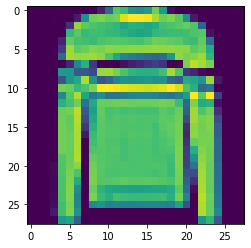

In [ ]:
# Trước hết, chúng ta sử dụng keras.datasets để load dữ liệu để hiển thị một số thông tin về dataset.
# Tải dữ liệu thời trang
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# In hình dạng tập huấn luyện
# Lưu ý: có 60.000 dữ liệu huấn luyện có kích thước hình ảnh 28x28, 60.000 nhãn tập huấn.
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

# In số lượng tập dữ liệu đào tạo và kiểm tra
print('Train set:', x_train.shape[0])
print('Test set:', x_test.shape[0])

# Xác định các nhãn
fashion_mnist_labels = [
  "T-shirt/top",  # index 0
  "Trouser",      # index 1
  "Pullover",     # index 2 
  "Dress",        # index 3 
  "Coat",         # index 4
  "Sandal",       # index 5
  "Shirt",        # index 6 
  "Sneaker",      # index 7 
  "Bag",          # index 8 
  "Ankle boot"    # index 9
]

# Chọn bất kỳ 1 số trong khoảng từ 0 đến 59,999
img_index = 5

# y_train chứa các nhãn, từ 0 đến 9 (index 0 -> 9 tương ứng với mỗi loại fashion)
label_index = y_train[img_index]

# In nhãn, ví dụ nhãn thứ 2 là Pullover (áo phông)
print("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))

# Hiển thị một trong những hình ảnh từ tập dữ liệu đào tạo
plt.imshow(x_train[img_index])

### Chuẩn hoá dữ liệu

Chuẩn hóa các dữ liệu để chúng có cùng tỷ lệ. Ở đây, `x_train`, `x_test` mang các giá trị nguyên từ 0 đến 255.

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
print("Số lượng dữ liệu train: " + str(len(x_train)))
print("Số lượng dữ liệu test: " + str(len(x_test)))

Số lượng dữ liệu train: 60000
Số lượng dữ liệu test: 10000


### Chia dữ liệu thành các tập dữ liệu


* **Training data**: được sử dụng để đào tạo mô hình
* **Validation data**: được sử dụng để điều chỉnh các siêu tham số và đánh giá các mô hình
* **Test data**: được sử dụng để kiểm tra mô hình sau khi mô hình đã trải qua quá trình kiểm duyệt ban đầu bởi bộ xác nhận.

In [ ]:
# Chia nhỏ dữ liệu thành các tập huấn luyện
# Trích từ tập training data ra một tập con nhỏ và thực hiện việc đánh giá mô hình trên tập con nhỏ này. Tập con nhỏ được trích ra từ training set này được gọi là validation set
# Đặt 5000 vào validation set và giữ 55.000 còn lại cho training set
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Định hình lại dữ liệu đầu vào từ (28, 28) thành (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
# One-hot encoding là một quá trình mà các biến phân loại (label) được chuyển đổi thành một mẫu có thể cung cấp cho các thuật toán để thực hiện công việc tốt hơn khi mà dự đoán.
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# In tập huấn luyện
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

# In số lượng tập dữ liệu of training, validation, and test datasets
print('Train set:', x_train.shape[0])
print('Validation set:', x_valid.shape[0],)
print('Test set:', x_test.shape[0],)

x_train shape: (55000, 28, 28, 1)
y_train shape: (55000, 10)
Train set: 55000
Validation set: 5000
Test set: 10000


### Xây dựng mô hình

Có 2 API để xác định 1 mô hình trong Keras

* [Sequential model API](https://keras.io/models/sequential/)
* [Functional API](https://keras.io/models/model/)

Ở bài này, bọn em sử dụng mô mình **Sequential model API** với một số API Keras sau:

* [Conv2D()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D/): Là convolution layer dùng để lấy feature từ image.
* [Pooling()](https://keras.io/layers/pooling/): Chứa các layer dùng trong mạng
* [Dropout()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout): Hạn chế overfiting






In [ ]:
# Khởi tạo models Sequential()
model = tf.keras.Sequential()

# Xác định hình dạng đầu vào trong lớp đầu tiên của neural network
# Tạo Convolutionnal Layers: Conv2D là convolution dùng để lấy feature từ ảnh với các tham số
# filters: số filter của convolution
# kernel_size: kích thước window search trên ảnh
# activation: chọn activation như linear, softmax, relu, tanh, sigmoid (relu là hàm trả về giá trị tích cực, nhưng không trả lại giá trị âm)
# padding: có thể là "valid" hoặc "same". Với same thì có nghĩa là padding =1.
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
# Hàm MaxPooling2D hoặc AvergaPooling1D, 2D (lấy max , trung bình) với từng size.
# pool_size: kích thước ma trận để lấy max hay average
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
# Dropout: chống over-fitting
# Hiểu đơn giản là, trong mạng neural network, kỹ thuật dropout là việc chúng ta sẽ bỏ qua một vài unit trong suốt quá trình train trong mô hình, những unit bị bỏ qua được lựa chọn ngẫu nhiên.
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

# Flatten dùng để lát phằng layer để fully connection (ví dụ: shape: 28x28 qua layer này sẽ là 784x1)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Bảng tóm tắt mô hình
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 32)         

### Biên dịch mô hình

Cấu hình quy trình huấn luyện với **compile() API** trước khi huấn luyện mô hình.

In [ ]:
# categorical_crossentropy: Dùng trong classifier nhiều class
# adam optimizer: Thuật toán tối ưu hoá
# metrics: Thước đo để ta đánh giá accuracy của model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

### Huấn luyện mô hô hình

Huấn luyện mô hình với **fit() API**.

Sử dụng [ModelCheckpoint API](https://keras.io/callbacks/#modelcheckpoint) để lưu mô hình sau mỗi epoch. Đặt `save_best_only = True` để chỉ lưu khi độ chính xác của validation set được cải thiện.

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(
    filepath='model.weights.best.hdf5',
    verbose = 1,
    save_best_only = True
)

# Batch_size: số lượng mẫu mà Mini-batch GD sử dụng cho mỗi lần cập nhật trọng số.
# Epoch là số lần duyệt qua hết số lượng mẫu trong tập huấn luyện.
# Ta có tập huấn luyện gồm 55.000 hình ảnh chọn batch-size là 55 images có nghĩa là mỗi lần cập nhật trọng số, ta dùng 55 images. Lúc đó ta mất 55.000/55 = 1000 iterations (số lần lặp) để duyệt qua hết tập huấn luyện (hoàn thành 1 epochs). Có nghĩa là khi dữ liệu quá lớn, chúng ta không thể đưa cả tập data vào train được, ta phải chia nhỏ data ra thành nhiều batch nhỏ hơn.
# batch_size (default = 1): Batch size ảnh hưởng đến chất lượng học của mô hình, batch size càng lớn thì mô hình sẽ càng học được tốt hơn.
model.fit(
    x_train,
    y_train,
    batch_size = 100,
    epochs = 20,
    validation_data=(x_valid, y_valid),
    callbacks=[checkpointer]
)

Epoch 1/20
550/550 [==============================] - ETA: 0s - loss: 0.2630 - accuracy: 0.9017
Epoch 00001: val_loss improved from inf to 0.23437, saving model to model.weights.best.hdf5
550/550 [==============================] - 68s 124ms/step - loss: 0.2630 - accuracy: 0.9017 - val_loss: 0.2344 - val_accuracy: 0.9110
Epoch 2/20
550/550 [==============================] - ETA: 0s - loss: 0.2516 - accuracy: 0.9060
Epoch 00002: val_loss improved from 0.23437 to 0.21307, saving model to model.weights.best.hdf5
550/550 [==============================] - 71s 129ms/step - loss: 0.2516 - accuracy: 0.9060 - val_loss: 0.2131 - val_accuracy: 0.9210
Epoch 3/20
550/550 [==============================] - ETA: 0s - loss: 0.2446 - accuracy: 0.9092
Epoch 00003: val_loss did not improve from 0.21307
550/550 [==============================] - 64s 116ms/step - loss: 0.2446 - accuracy: 0.9092 - val_loss: 0.2131 - val_accuracy: 0.9172
Epoch 4/20
550/550 [==============================] - ETA: 0s - loss: 0

### Mô hình với validation tốt nhất

In [69]:
model.load_weights('model.weights.best.hdf5')

### Mô phỏng

In ra 15 hình ảnh từ tập dữ liệu test set và đặt tên nhãn. Nếu đúng, nhãn sẽ có màu xanh và ngược lại nhãn sẽ màu đỏ.

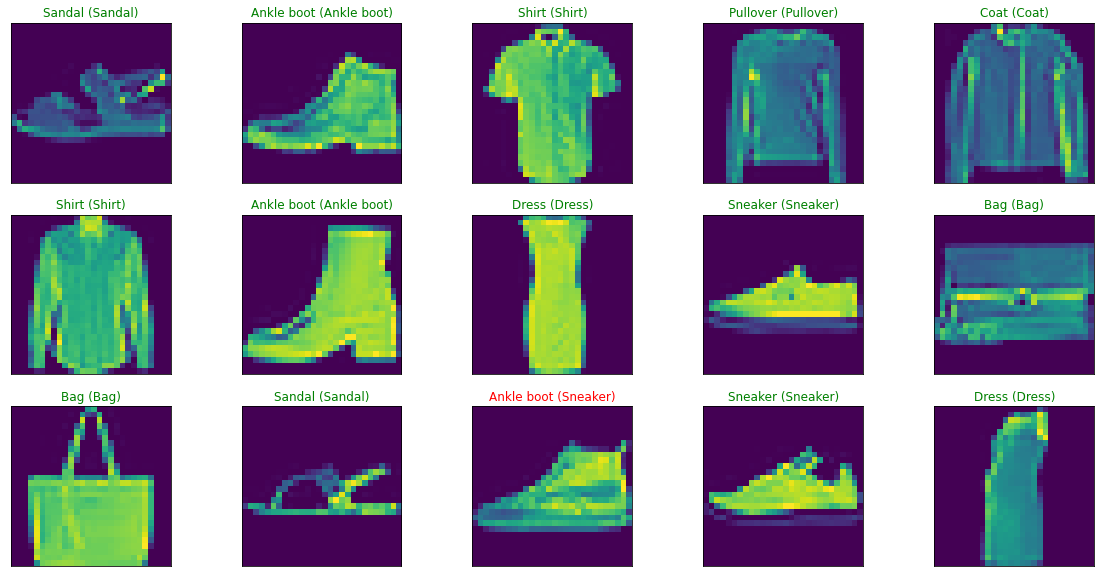

In [70]:
y_mophong = model.predict(x_test)

# Lấy ngẫu nhiên 15 hình ảnh từ tập test để kiểm tra
figure = plt.figure(figsize=(20,10)) # Kích thức ảnh
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)): # ramdom 15 ảnh từ tập test set
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    
    # Hiển thị từng hình ảnh
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_mophong[index])
    true_index = np.argmax(y_test[index])

    # Đặt nhãn cho mỗi hình ảnh
    ax.set_title("{} ({})".format(
        fashion_mnist_labels[predict_index],
        fashion_mnist_labels[true_index]),
        color=("green" if predict_index == true_index else "red")
    )

### Kiểm tra độ chính xác

In [72]:
# Đánh giá mô hình trên test set
score = model.evaluate(x_test, y_test, verbose=0)

# Kiểm tra độ chính xác
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.21588996052742004
Test accuracy: 0.9235000014305115


### Kết luận

Huấn luyện thành công Convolutional Neural Network (CNN) để phân loại Fashion-MNIST với độ chính xác khoảng 92% 🎉